In [10]:
import numpy as np
import pysindy as ps
from pysindy.feature_library import PolynomialLibrary, FourierLibrary, CustomLibrary

import matplotlib.pyplot as plt
from IPython.display import display, Latex

from generate_data import generate_tracking_data

In [11]:
t = np.linspace(0, 20, 1001)
x0 = [0.1, 0.1, 0]

u = lambda t: 0.01*np.sin(t)

x, x_dot = generate_tracking_data(t=t, x0=x0, u=u)

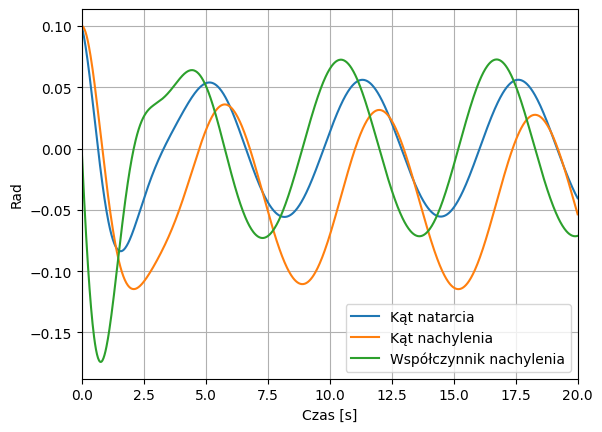

In [12]:
plt.plot(t, x[:, 0])
plt.plot(t, x[:, 1])
plt.plot(t, x[:, 2])
plt.legend(["Kąt natarcia", "Kąt nachylenia", "Współczynnik nachylenia"])
plt.xlim(0, max(t))
plt.xlabel("Czas [s]")
plt.ylabel("Rad")

plt.grid()
plt.show()